In [150]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.utils import shuffle

from datetime import datetime

## Получение данных

In [2]:
# подготовка данных
def setPrepare(fileArray, dir):
        
    dfArray = []
        
    for i in range(len(fileArray)):
        print(f"start \"{fileArray[i]}\"")
        print(datetime.now())
        df = pd.read_fwf('../../'+ dir +'/'+fileArray[i])
        df = df.drop (index= 0 )
        df = df.drop (index= len(df))
        df = df.reset_index()
        del df['index']
        df['name_otk'] = df['name_otk'].apply(
            lambda x: x.split('\\\\')[len(x.split('\\\\'))-1]
        )            
        df['result'] = df['result_otk']        
        rernameResault(df)             
        
        df['date_in'] = df['date_in'].apply(
            lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')
        )
        
        print(f"Количество данных после обработки: {df.shape}")
        dfArray.append([])
        dfArray[i] = df        
        print(datetime.now())
        print(f"finish \"{fileArray[i]}\"")
        print("\n")
    return dfArray

In [3]:
def rernameResault(df):
    dfNotAccept = df.loc[((df['result_otk']=='Не соответствует'))]
    for i in range(len(dfNotAccept)):
        df['result'].iloc[dfNotAccept.index[i]] = df['name_otk'].iloc[dfNotAccept.index[i]]  

##


In [4]:
def getFileName(dir):
    directory = '../../'+dir+'/'
    fileArray = os.listdir(directory)
    return fileArray

In [5]:
dir = 'dataKontrol'
fileArray = getFileName(dir)

dfArray = setPrepare(fileArray, dir)
dfArray

start "2019-0_1_2.rpt"
2023-11-13 18:21:29.964212


Количество данных после обработки: (158567, 11)
2023-11-13 18:21:59.843871
finish "2019-0_1_2.rpt"


start "2020-0_1_2.rpt"
2023-11-13 18:21:59.843871
Количество данных после обработки: (1467678, 11)
2023-11-13 18:25:56.518829
finish "2020-0_1_2.rpt"


start "2021-0_1_2.rpt"
2023-11-13 18:25:56.518829
Количество данных после обработки: (3059511, 11)
2023-11-13 18:34:11.399005
finish "2021-0_1_2.rpt"


start "2022-0_1_2.rpt"
2023-11-13 18:34:11.399005
Количество данных после обработки: (4095433, 11)
2023-11-13 18:45:38.958733
finish "2022-0_1_2.rpt"


start "2023-0_1_2.rpt"
2023-11-13 18:45:38.962728
Количество данных после обработки: (7262232, 11)
2023-11-13 19:12:32.667329
finish "2023-0_1_2.rpt"


start "2023-3_4.rpt"
2023-11-13 19:12:32.667329
Количество данных после обработки: (2215826, 11)
2023-11-13 19:19:29.467975
finish "2023-3_4.rpt"




[                   num_prod id_marsh                           name_otk  \
 0       00-03.07.2019.00049    61730                   Термический след   
 1       00-03.07.2019.00049    61730                  Сколы поверхности   
 2       00-03.07.2019.00049    61730                 Оторванные волокна   
 3       00-03.07.2019.00049    61730                       Сухой ровинг   
 4       00-03.07.2019.00049    61730                 Расслоение по телу   
 ...                     ...      ...                                ...   
 158562   00-10.050091.00769   233870                    Скопление смолы   
 158563   00-10.050091.00769   233870     Избыток смолы на одной стороне   
 158564   00-10.050091.00769   233870    Трещины на наружной поверхности   
 158565   00-10.050091.00769   233870  Трещины на внутренней поверхности   
 158566   00-10.050091.00769   233870          Сбой режима полимеризации   
 
            result_otk                 date_in id_w_in  id_el      art_num  \
 0      

In [6]:
dfArray[0]

,num_prod,id_marsh,name_otk,result_otk,date_in,id_w_in,id_el,art_num,id_ttp,time_etap,result
0,00-03.07.2019.00049,61730,Термический след,Соответствует,2019-07-03 10:28:15.870,917,21328,D27CK13AN61,10047,00:17:00.0000000,Соответствует
1,00-03.07.2019.00049,61730,Сколы поверхности,Соответствует,2019-07-03 10:28:15.870,917,21328,D27CK13AN61,10047,00:17:00.0000000,Соответствует
2,00-03.07.2019.00049,61730,Оторванные волокна,Соответствует,2019-07-03 10:28:15.870,917,21328,D27CK13AN61,10047,00:17:00.0000000,Соответствует
3,00-03.07.2019.00049,61730,Сухой ровинг,Соответствует,2019-07-03 10:28:15.870,917,21328,D27CK13AN61,10047,00:17:00.0000000,Соответствует
4,00-03.07.2019.00049,61730,Расслоение по телу,Соответствует,2019-07-03 10:28:15.870,917,21328,D27CK13AN61,10047,00:17:00.0000000,Соответствует
...,...,...,...,...,...,...,...,...,...,...,...
158562,00-10.050091.00769,233870,Скопление смолы,Соответствует,2019-12-25 21:48:18.847,558,20701,D23CK17AN47,10047,00:15:00.0000000,Соответствует
158563,00-10.050091.00769,233870,Избыток смолы на одной стороне,Соответствует,2019-12-25 21:48:18.847,558,20701,D23CK17AN47,10047,00:15:00.0000000,Соответствует
158564,00-10.050091.00769,233870,Трещины на наружной поверхности,Соответствует,2019-12-25 21:48:18.847,558,20701,D23CK17AN47,10047,00:15:00.0000000,Соответствует
158565,00-10.050091.00769,233870,Трещины на внутренней поверхности,Соответствует,2019-12-25 21:48:18.847,558,20701,D23CK17AN47,10047,00:15:00.0000000,Соответствует


2019-0_1_2.rpt


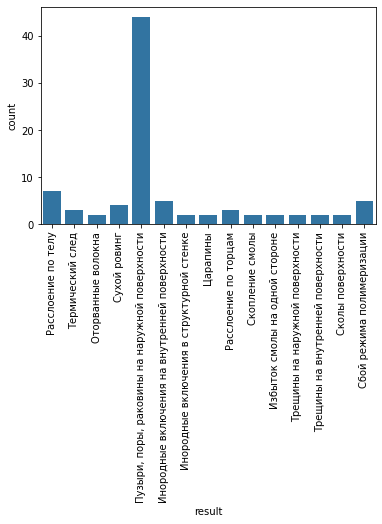

2020-0_1_2.rpt


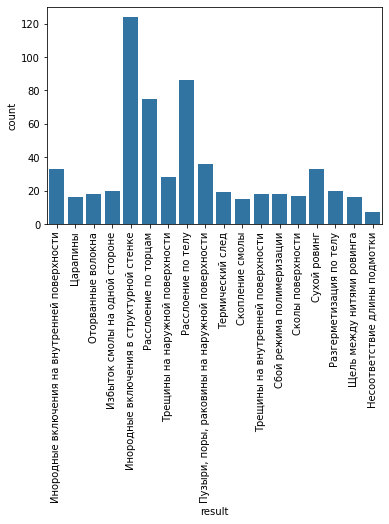

2021-0_1_2.rpt


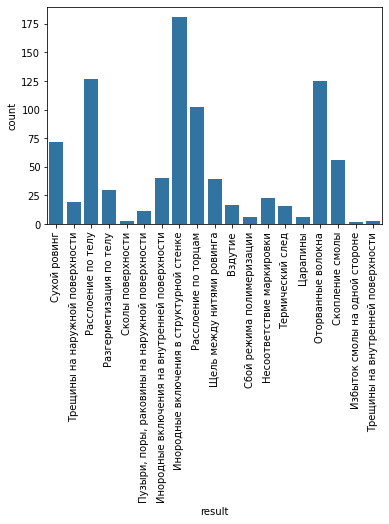

2022-0_1_2.rpt


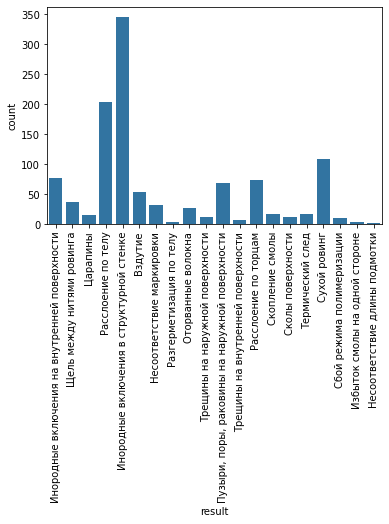

2023-0_1_2.rpt


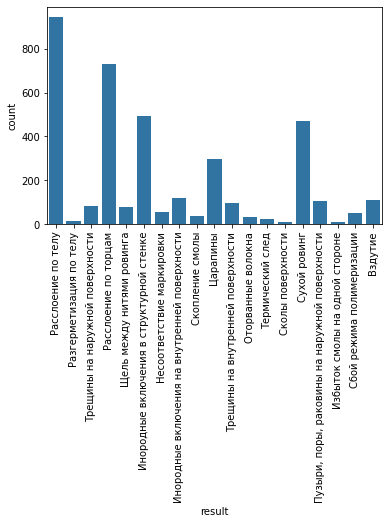

2023-3_4.rpt


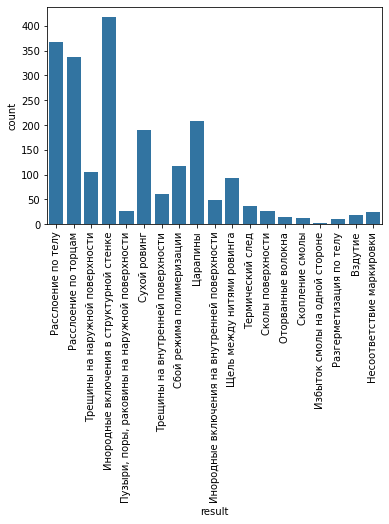

In [140]:
for i in range(len(dfArray)):
    print(fileArray[i])
    df = dfArray[i].loc[((dfArray[i]['result_otk']=='Не соответствует'))]
    sns.countplot(x=df['result'])
    plt.xlabel('result')
    plt.xticks(rotation=90)
    plt.show()

In [20]:
for i in range(len(dfArray)):
    print(fileArray[i])
    df = dfArray[i].loc[((dfArray[i]['result_otk']=='Не соответствует'))]
    print(len(df['result_otk']))
    print(len(df['result_otk'])/len(dfArray[i]['result_otk']))
    print("\n")
    

2019-0_1_2.rpt
87
0.0005486639716965068


2020-0_1_2.rpt
599
0.0004081276683305194


2021-0_1_2.rpt
878
0.00028697396414002107


2022-0_1_2.rpt
1121
0.00027371953099953044


2023-0_1_2.rpt
3761
0.0005178848596409479


2023-3_4.rpt
2116
0.0009549486286378082




файлы не сбалансированы, возьмем для работы такое же количество данных, сколько не соответстующих параметров

In [162]:
def createNewFrame():
    newFrame = dfArray[0].loc[((dfArray[0]['result_otk']=='Не соответствует'))]
    for i in range(len(dfArray)):
        dfArrayShufle = shuffle(dfArray[i].loc[((dfArray[i]['result']=='Соответствует'))])
        lenArr = len(dfArray[i].loc[((dfArray[i]['result_otk']=='Не соответствует'))])
        
        if i != 0:
            newFrame = newFrame.append(dfArray[i].loc[((dfArray[i]['result_otk']=='Не соответствует'))])
        newFrame = newFrame.append(dfArrayShufle.iloc[:lenArr])
    return newFrame

In [172]:
newFrame = createNewFrame()
newFrame

,num_prod,id_marsh,name_otk,result_otk,date_in,id_w_in,id_el,art_num,id_ttp,time_etap,result
741,00-12.07.2019.00052,71869,Расслоение по телу,Не соответствует,2019-07-12 10:36:50.207,961,21328,D27CK13AN61,10047,00:17:00.0000000,Расслоение по телу
1022,00-12.07.2019.00055,71946,Термический след,Не соответствует,2019-07-12 11:14:07.670,961,21328,D27CK13AN61,10047,00:17:00.0000000,Термический след
1023,00-12.07.2019.00055,71946,Оторванные волокна,Не соответствует,2019-07-12 11:14:07.670,961,21328,D27CK13AN61,10047,00:17:00.0000000,Оторванные волокна
1024,00-12.07.2019.00055,71946,Сухой ровинг,Не соответствует,2019-07-12 11:14:07.670,961,21328,D27CK13AN61,10047,00:17:00.0000000,Сухой ровинг
1025,00-12.07.2019.00055,71946,Расслоение по телу,Не соответствует,2019-07-12 11:14:07.670,961,21328,D27CK13AN61,10047,00:17:00.0000000,Расслоение по телу
...,...,...,...,...,...,...,...,...,...,...,...
1310807,00-13.055686.14847,4290379,"Пузыри, поры, раковины на наружной поверхности",Соответствует,2023-09-28 10:08:20.843,1000000122,21442,L31FK4AN76-10.0,10162,00:15:00.0000000,Соответствует
467935,00-14.055339.05502,3967056,Сбой режима полимеризации,Соответствует,2023-08-26 01:23:32.567,1000000064,21352,L41FK17AN95G-10.0,10162,00:19:00.0000000,Соответствует
1577541,00-14.055899.16075,4416129,Расслоение по телу,Соответствует,2023-10-10 12:53:00.760,1000000062,21442,L31FK4AN76-10.0,10162,00:15:00.0000000,Соответствует
1865022,00-13.055866.01794,4489526,Расслоение по телу,Соответствует,2023-10-25 07:43:10.930,1000000134,21582,L8FMS4AN196_10.0,2,00:30:00.0000000,Соответствует


In [173]:
newFrame = newFrame.drop(columns=['num_prod','name_otk','result_otk','id_w_in','id_ttp','time_etap'], axis=1)
newFrame

,id_marsh,date_in,id_el,art_num,result
741,71869,2019-07-12 10:36:50.207,21328,D27CK13AN61,Расслоение по телу
1022,71946,2019-07-12 11:14:07.670,21328,D27CK13AN61,Термический след
1023,71946,2019-07-12 11:14:07.670,21328,D27CK13AN61,Оторванные волокна
1024,71946,2019-07-12 11:14:07.670,21328,D27CK13AN61,Сухой ровинг
1025,71946,2019-07-12 11:14:07.670,21328,D27CK13AN61,Расслоение по телу
...,...,...,...,...,...
1310807,4290379,2023-09-28 10:08:20.843,21442,L31FK4AN76-10.0,Соответствует
467935,3967056,2023-08-26 01:23:32.567,21352,L41FK17AN95G-10.0,Соответствует
1577541,4416129,2023-10-10 12:53:00.760,21442,L31FK4AN76-10.0,Соответствует
1865022,4489526,2023-10-25 07:43:10.930,21582,L8FMS4AN196_10.0,Соответствует


In [177]:
shuffle(newFrame).to_csv('../../readyData/newFrame.csv', index=False)